In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
data_file = "../../../data/grion_whisking_windows_r4_df.out"
df = pd.read_pickle(data_file)
df.head()

whisking   
0  [2.3486600682254624, 2.411172882170372, 2.4050...  \
1  [1.637708557904865, 1.5696237811025924, 1.5914...   
2  [1.9210073628293332, 1.939113888745965, 1.9518...   
3  [1.8110740715050755, 1.8496222590326912, 1.814...   
4  [1.7366919055358443, 1.7780166679343818, 1.841...   

                                      whisking_times   
0  [-0.07600000000002183, -0.07499337748346525, -...  \
1  [-0.07600000000002183, -0.07499337748346525, -...   
2  [-0.07600000000002183, -0.07499337748346525, -...   
3  [-0.07600000000002183, -0.07499337748346525, -...   
4  [-0.07600000000002183, -0.07499337748346525, -...   

                                   whisking_filtered   
0  [0.30817718274936795, 0.25519439070593863, 0.1...  \
1  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2  [-0.13702588860039625, -0.058468536278127876, ...   
3  [-0.3263511716872302, -0.31098559667022674, -0...   
4  [0.07968540065909392, 0.13220426934839596, 0.1...   

                             whisking_filtered_times   
0  [-0.07600000000002183, -0.06939130434784602, -...  \
1  [-0.07600000000002183, -0.06939130434784602, -...   
2  [-0.07600000000002183, -0.06939130434784602, -...   
3  [-0.07600000000002183, -0.06939130434784602, -...   
4  [-0.07600000000002183, -0.06939130434784602, -...   

                                    whisking_hilbert   
0  [0.6344409393405934, 0.7824647693472935, 0.904...  \
1  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2  [-2.239044398381649, -1.9032476007855805, -1.5...   
3  [-2.975951812795368, -2.8502176960099255, -2.7...   
4  [-1.1941833896867398, -0.9491479243660513, -0....   

                              whisking_hilbert_times  
0  [-0.07600000000002183, -0.06939130434784602, -...  
1  [-0.07600000000002183, -0.06939130434784602, -...  
2  [-0.07600000000002183, -0.06939130434784602, -...  
3  [-0.07600000000002183, -0.06939130434784602, -...  
4  [-0.07600000000002183, -0.06939130434784602, -...

In [13]:
len(df["whisking_hilbert"][0])

24

After some trouble extracting the whisking windows around the whiskers surface touch, I found the issue: I forgot to specify the start_time in `tools.compute_hilbert_envelope`, in such a way that the returned times were not aligned with the original timeseries. I fixed it and now it works as expected, hopefully.

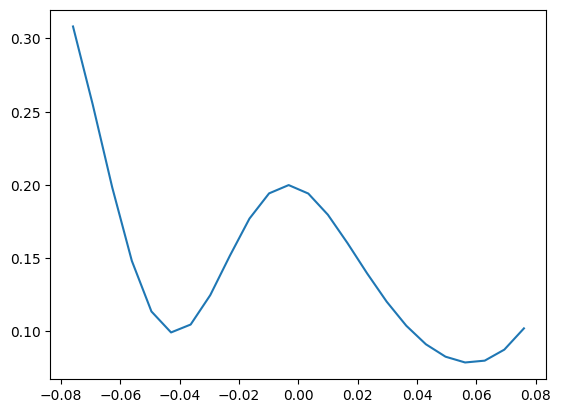

In [14]:
plt.plot(df["whisking_filtered_times"][0], df["whisking_filtered"][0])

The timerange around whiskers contact is really short.
It may be hard to get insights on phase reset with such data?